# การทำ Web Scraping ด้วย Python

#### --- แนะนำให้ใช้ Python 3 ---

ก่อนอื่นเรามาทำการ Import Library ต่างๆ ที่จำเป็นต้องใช้กัน

- `urllib` ใช้ในการเปิด url และโหลดหน้าเวบเพจ
- `BeautifulSoup` ใช้ในการประมวลผลหน้า HTML 
- `sleep` ใช้ในการรอก่อนจะส่ง request หน้าเวบอันต่อไป
- `copy` ใช้ในการ copy object 

In [ ]:
import urllib
from bs4 import BeautifulSoup
from time import sleep
import copy

ทดลองดึงข้อมูล GDH จาก Wikipedia https://th.wikipedia.org/wiki/จีดีเอช_ห้าห้าเก้า

<img src="https://i.bug-a-boo.tv/images/5d67f5de7caf08b85e02d97e2770b7ff/bugabooimage.jpg"/>

โดยปกติแล้ว url จะต้องประกอบไปด้วยตัวอักษร ASCII เท่านั้น นั่นคือเป็นภาษาไทยไม่ได้! เราจะต้องทำการแปลง (หรือเรียกว่าการ quote string) ให้อยู่ในรูปแบบของ percent-encoded string เสียก่อนโดยใช้ฟังก์ชัน `urllib.quote()` (ปกติ browser ของเราจะทำการแปลงให้อัตโนมัติ ถ้าเราพิมพ์ภาษาไทยเข้าไป) 

# Section 1 : Quote/Unquote

In [ ]:
page = 'จีดีเอช'

print('จีดีเอช' + ' => ' + urllib.parse.quote(page)) # Use urllib.quote() for Python 2

url = 'http://th.wikipedia.org/wiki/' + page

print("\n")
print(url)

In [ ]:
# ----- TO DO 1.1 ----- 
# แปลงข้อมูลในตัวแปร page โดยใช้ urllib.parse.quote() ให้อยู่ในรูปแบบ percent-encoded string 
# แล้วนำไปต่อท้าย 'http://th.wikipedia.org/wiki/' แล้วเก็บไว้ในตัวแปร url ตามเดิม

url = 'http://th.wikipedia.org/wiki/' + [เติมอะไรดีน้าาาาา]
print(url)

ผลลัพธ์ที่ควรจะได้คือ 

result

เมื่อได้ url ที่พร้อมใช้งานแล้ว เราก็เรียก `urllib.urlopen()` ตามด้วยคำสั่ง `read()` เพื่ออ่านไฟล์ HTML ได้เลย 

ก่อนจะ `print()` เราอาจจะอยาก unquote string ก่อน เพื่อให้เราอ่าน url ใน link ต่างๆ บนหน้า HTML ที่เป็นภาษาไทยได้ง่ายขึ้น (ไม่เชื่อลอง `print()` แบบไม่ unquote ดู!)

In [ ]:
html = urllib.request.urlopen(url).read() 

# ลองสังเกตผลก่อนหลัง unquote ดูสิ

print(str(html)[165484:165484 + 200])

print("\n")

print(urllib.parse.unquote(str(html))[165484:165484 + 200]) 

# Section 2 : BeautifulSoup

จากนั้นก็เรียกใช้งาน BeautifulSoup เพื่อทำการประมวลผล (parse) หน้า HTML ที่เราได้มา 

In [ ]:
soup = BeautifulSoup(html, 'html.parser')

# เลือกมาแสดงผลแค่ 1,000 อักขระจะได้ไม่ยาวจนเกินไป
# เมธอด .prettify จะช่วยจัดหน้า html ให้สวยงามและดูง่ายขึ้น

print(soup.prettify()[:1000])

## บริษัทในเครือปัจุบันของ GDH

ในแบบฝึกหัดนี้เราจะทำการดึงข้อมูลบริษัทในเครือปัจจุบันและรายชื่อผู้กำกับภาพยนตร์ในสังกัด GDH จากหน้าวิกิพีเดียกัน 

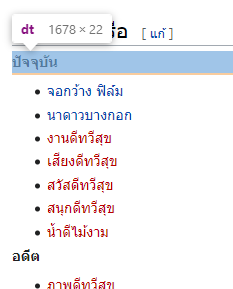

จากภาพข้างต้น จะเห็นได้ว่าหัวข้อของตารางที่เขียนว่า **ปัจจุบัน** นั้น อยู่ภายใน Tag `<dt>` (description term) ทีนี้เรามาดูกันว่า เราจะสามารถดึง Element นั้นออกมาใช้งานได้อย่างไรบ้าง ค่อยๆลอง uncomment แต่ละวิธีแล้วลองรันดู

In [ ]:
# soup.find? 

print("1. soup.find('dt'):")
print(soup.find('dt'))

#print("2. soup.dt:") # shorthand 
#print(soup.dt) 

#print("3. soup.find_all('dt'):")
#print(soup.find_all('dt'))

# print("4. soup('dt'):") # shorthand 
# print(soup('dt')) 

#print("5. soup.find_all('dt')[0]:")
#print(soup.find_all('dt')[0])

เนื่องจากหัวข้อปัจจุบันอยู่ใน Tag `<dt>` อันแรกของเพจนั้น เราสามารถเรียกใช้ element ได้ด้วยคำสั่ง `soup.find('dt')` หรือ `soup.dt`
หรือหากเราอยากจะหา element `<dt>` ทั้งหมดก่อน แล้วค่อยเลือก element ที่เราต้องการ ก็ทำได้เช่นกัน แบบในตัวอย่างสุดท้าย

In [ ]:
# ตัวอย่างการค้นหาชื่อบริษัท โดยเริ่มจากการหา tag <dt> แล้วค่อยเข้าไปหา tag <ul> จากนั้นหาทุก tag <li>

'''
ถ้าสังเกตดีๆจะพบว่ามี hierarchy ดังนี้ เป้าหมายของเราคือต้องการข้อมูลใน <li> ทั้งหมด

<dl>
    <dt>ปัจจุบัน</dt>
<dl>
<ul>
    <li>จอกว้างฟิลม์</li>
    <li>นาดาว บางกอก</li>
    <li>งานดีทวีสุข</li>
    <li>..........</li>
</ul>

'''

# เริ่มต้น การที่เราจะได้รายชื่อทั้งหมดมาได้ก็ต้องหาจุดเริ่มต้นของเรานั่นคือคำว่า "ปัจจุบัน"
# ซึ่งมี tag <dt> ครอบอยู่ดังนั้นเราจะหา <dt> กันก่อน

new_comp = soup.find('dt')
print(new_comp)

In [ ]:
# หากดูใน hierarchy จะพบว่า <li> อยู่ภาพใต้ <ul> ซึ่ง <ul> อยู่ถัดไปจาก <dt> ที่เราเคยค้นหามาก่อนหน้านี้
# ดังนั้นเราสามารถค้นหา <ul> ที่อยู่ติดกันได้โดยใช้คำสั่ง find_next('ul') ดังตัวอย่างด้านล่าง

new_comp = soup.find('dt').find_next('ul')
print(new_comp)

# ดูที่ผลลัพธ์! เนื่องจาก <li> อยู่ภายใต้ <ul> เวลาเรา find <ul> เราจะได้ลูกหลานที่อยู่ภายใน tag นั้นติดมาด้วย
# ซึ่งก็คือได้ <li> ทั้งหมดติดมาด้วยนั่นเอง

In [ ]:
# ในขั้นตอนนี้เราจะดึงข้อมูลจาก <li> ทั้งหมดออกมา หากเราใช้ find_next('li')เราจะได้แค่ <li> อันแรกออกมา
# ดังนั้นเราจะใช้ find_all('li') เพื่อให้ได้ทุก <li> ที่อยู่ภายใน <ul>

new_comp = soup.find('dt').find_next('ul').find_all('li')

# แสดงจำนวนข้อมูลภายใน list
print(f"Total length in list = {len(new_comp)}\n")

# ใช้ for loop เพื่อแสดงผลข้อมูลแต่ละตัวใน new_comp_list
for t in new_comp:
    print(t)
    print("\n")

In [ ]:
# การเอาค่าออกมาจาก tag ก็ต้องดูว่าค่านั้นอยู่ภายใต้ tag ย่อยๆอะไร จากตัวอย่างก่อนหน้าสังเกตว่า 
# <li> <a> จอกว้าง ฟิล์ม </a> </li>
# สามารถแสดงผล text ได้ดังนี้

for t in new_comp:
    print(t.a.text)

In [ ]:
# เพิ่มเติม ควรอ่าน!!!
# จริงๆแล้ว ดูเหมือนว่า <li> จะอยู่ภายใต้ <ul> 
# ทำไมเราถึงไม่ for loop เพื่อวนเอาค่าใน li ออกมาหละ ทำไมต้อง find_all('li') ด้วย

new_comp = soup.find('dt').find_next('ul')
print(f"Total length in list = {len(new_comp)}\n")

# จากข้อก่อนหน้าถ้าเราใช้ find_all('li') จะได้ข้อมูลมาทั้งหมด 7 ตัวตามรายชื่อบริษัทที่แสดงในเว็บ
# แต่ถ้าเราใช้ for loop ดันมีข้อมูลทั้งหมด 13 ตัว นั่นเป็นเพราะว่ามันติดข้อมูล space ว่างๆออกมาด้วย [NavigableString](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#navigablestring)
# ซึ่งสามารถเกิดขึ้นได้ตอนเขียนเว็บ
# ดังนั้นต้องระวัง เรื่องนี้ให้ดีนะครับ !!!

for index, k in enumerate(new_comp):
    print(index)
    print(f"→{k}←{type(k)}")
    print("--------------------------------------------------------------------")

In [ ]:
# วิธีแก้อีกแบบนึงคือใช้ try except แต่เอาง่ายๆก็คือกลับไปใช้ find_next() และ find_all()
# ไม่เชื่อลองเอา try, except ออกดูสิ ว่าจะเกิดอะไรขึ้น

for k in new_comp:
    try:
        print(k.a.text)
    except Exception as e: 
        pass

#### แนะนำการใช้ try-except

try-except มีไว้เพื่อช่วยจัดการข้อผิดพลากที่อาจเกิดขึ้นได้ในคำสั่งของเรา เพราะว่าบางคำสั่งในโปรแกรมของเราอาจจะเกิดข้อผิดพลาดและทำให้โปรแกรมหยุดทำงานกะทันหันได้ ดังนั้นทางที่ดีเราควรที่จะเพื่อจัดการข้อผิดพลาดที่อาจจะเกิดขึ้น โดยโปรแกรมจะทดลองทำตามคำสั่งใน try ก่อนหากไม่มี error เกิดขึ้นก็จะทำงานในคำสั่งถัดไป แต่ถ้าหากว่ามีข้อผิดพลาดเกิดขึ้นโปรแกรมจะไปทำงานในคำสั่ง except แทนโดยเราสามารถกำหนดวิธีการในการจัดการกับ error ในแต่ละประเภทได้

เพิ้มเติม: [https://www.w3schools.com/python/python_try_except.asp](https://www.w3schools.com/python/python_try_except.asp)

In [ ]:
# ----- TO DO 1.2 -----
# ลองดึงบริษัทในเครือ (อดีต) มาแสดงผลให้หน่อย
# ง่ายจะตาย :)






######################################

ต้องได้คำตอบแบบนี้ถึงจะถูก 

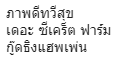

## Social media - GDH

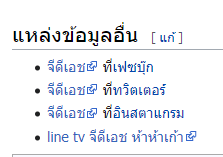

ในขั้นตอนนี้เราจะลองดึงข้อมูล social media จากเพจ GDH ใน wikipedia

In [ ]:
# ----- TO DO 1.3 -----
# จงหา link ของ social media [facebook, twitter, instagram, tv.line] มาแสดงผล
# มี code มาให้แล้ว ช่วยเติมสิ่งที่ขาดหายไปหน่อย
# Hint : หาจากคำว่า "แหล่งข้อมูลอื่น"

social_media = soup.[เติมอะไรดีน้าาาาาาาาาาาาา]

print(social_media)

In [ ]:
# เนื่องจากเรา find_all (เพราะว่าแหล่งข้อมูลอื่นปรากฏอยู่หลายที่ในเว็บไซต์ ทำให้เราต้องเลือกว่าจะใช้อันไหน)
# เติม index ให้หน่อยว่า 0 หรือ 1 หรือ 2 หรือ 3

sm_ul = social_media[1]
print(sm_ul)

In [ ]:
'''
<h2>
    <span>แหล่งข้อมูลอื่น</span>
</h2>
<ul>
    <li>....เฟสบุ๊ก</li>
    <li>....ทวิตเตอร์</li>
    <li>....อินสตาแกรม</li>
    <li>....line tv</li>
</ul>
'''

# หาก inspect ดูจะพบว่าหากเราค้นหาด้วย <span> เราจะอยู่ภายใต้ <h2> 
# ดังนั้นหากต้องการไปยัง <ul> เราควรที่จะต้องถอยกลับมาที่ <h2> ก่อนแล้วถึงค่อยไปหา <ul>
# เราสามารถถอยกลับมาได้โดยใช้คำสั่ง .parent เพื่อหลับไปยัง <h2> จากนั้นใช้ find_next_sibling() เพื่อไปยัง tab ถัดไป

for li in sm_ul.parent.parent.find_next_sibling():
    try:
        print(li.a['href'])
    except:
        continue

## นักแสดงนาดาวบางกอก

ได้เวลาทดสอบความสามารถกันแล้ว! ลองเขียนโค้ดเพื่อดึงรายชื่อนักแสดงในสังกัดนาดาวบางกอก จากวิกิพีเดียกันดู

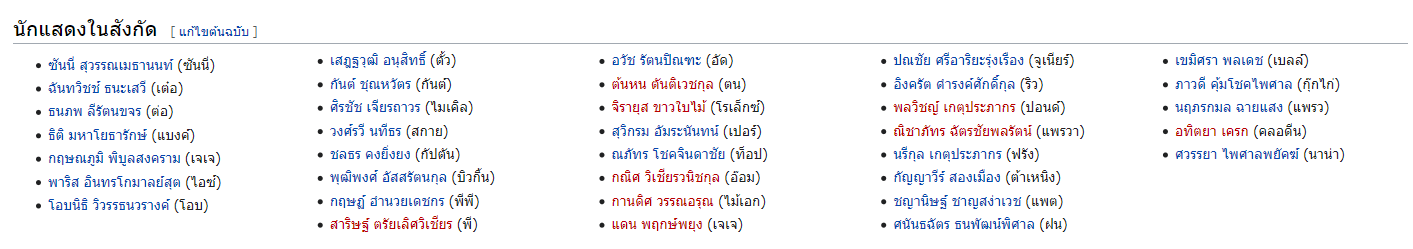

In [ ]:
# เปลี่ยนหน้าเว็บที่เราจะ scrape

page2 = 'นาดาวบางกอก'
url2 = 'http://th.wikipedia.org/wiki/' + urllib.parse.quote(page2)
html2 = urllib.request.urlopen(url2).read()
soup2 = BeautifulSoup(html2, 'html.parser')

In [ ]:
# ----- TO DO 2 -----
# ดึงรายชื่อนักแสดงนาดาวบางกอกมาแสดงผล

artists_list = 







######################################

# Section 3 : ดึงข้อมูลจากตาราง

### ผลงานละครโทรทัศน์ของ GDH

ในแบบฝึกหัดต่อไป เราจะมาทำการดึงข้อมูลละครโทรทัศน์ของ GDH จากหน้าวิกิพีเดียกัน ว่าหนังแต่ละเรื่องออกอากาศเมื่อไหร่ ออกที่ช่องไหนและบริษัทที่ร่วมผลิตคือบริษัทใด

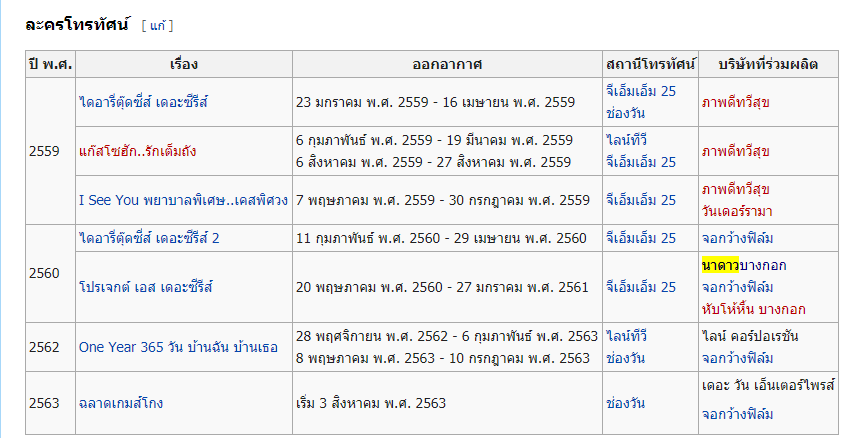

In [ ]:
drama_tag = soup.find_all('span', string='ละครโทรทัศน์')
print(drama_tag)


<img src="https://github.com/Mixelon-tera/WebScraping-2/raw/master/source/span_drama.png" width="600" align="left">

In [ ]:
# เลือกข้อมูล index ที่ 1 (อันหลัง) เพราะตรงกับ tag ที่ใกล้กับตาราง ไม่เชื่อลอง inspect ดูสิ

table = soup.find_all('span', string='ละครโทรทัศน์')[1].find_next('table')
print(table)

ปัญหาอย่างหนึ่งของตารางนี้ คือการใช้คำสั่ง `rowspan` ทำให้แต่ละแถว `<tr>` ในตาราง อาจะมีจำนวนคอลัมน์ `<td>` ไม่เท่ากัน ส่งผลให้ชื่อหนัง อาจจะอยู่ในคอลัมน์ที่ 0 หรือ 1 ก็ได้ ขึ้นอยู่กับว่าแถวนั้นเป็นแถวแรกของปีนั้นๆหรือไม่ 

<img src="https://github.com/Mixelon-tera/WebScraping-2/raw/master/source/rowspan.png" width=300 >

เพื่อความง่าย เราจะไม่สนใจปีที่หนังเข้าฉายกันไปก่อน และลบ `<td>` ทุกอันที่มีการระบุค่า `rowspan` ด้วยฟังก์ชัน `extract()` เนื่องจากเดี๋ยวเราจะกลับมาใช้ตารางเต็มๆกันอีกครั้ง เราจึงต้องสร้างอีก copy `table` ไว้ก่อน 


In [ ]:
simplified_table = copy.copy(table) # จะเกิดอะไรขึ้นถ้าเราใช้ `simplified_table = table` ? 
for td in simplified_table('td', {'rowspan': True}):
    td.extract() # ลบ element จาก DOM tree

print(urllib.parse.unquote(str(simplified_table)))

จะเห็นได้ว่า ตอนนี้ทุกแถวมี `<td>` สามอัน เท่ากันหมดแล้ว ("ปี พ.ศ." หายไปแล้ว) ทีนี้เราก็สามารถดึงข้อมูลออกมาได้ง่ายๆตามนี้

In [ ]:
for tr in simplified_table('tr'):
    cells = tr('td')
    if len(cells):  # ทำไมต้องมีบรรทัดนี้ ?
        # ใช้ .strip() เพื่อตัด space ว่างและ \n ทิ้ง ตอนแสดงผลจะได้สวยงาม
        print('"%s", "%s", "%s", "%s"' % (cells[0].text.strip(), cells[1].text.strip(), cells[2].text.strip(), cells[3].text.strip()))

สำหรับคนที่อยากรู้ว่า ถ้าจะเอาข้อมูลปีที่เข้าฉายมาใช้ด้วย เราจะทำได้อย่างไร ลองพยายามทำความเข้าใจโค้ดข้างล่างนี้ดู

In [ ]:
# copy ข้อมูล table ไว้เพื่อที่จะได้ไม่ต้องเก็บใหม่ ในกรณีที่ข้อมูลถูกแก้ไขหรือเสียหายก็สามารถดึงข้อมูลจากต้นฉบับได้เลย
dup_table = copy.copy(table)

rows = dup_table('tr')
header = rows[0]
n_cols = len(header('th'))

current_year = None
movies = []

# วน loop ทุกๆ row
for tr in rows[1:]:
    movie = {}
    
    # เลือกทุก column ในแถวนั้น จะได้ [ปี พ.ศ., เรื่อง, ออกอากาศ, สถานีโทรทัศน์, บริษัทท่ร่วมผลิต]
    cells = tr('td')

    # ถ้า column ในแถวนั้นมี attribute 'rowspan' ให้เก็บ text นั้นไว้ใน current_year
    if cells[0].has_attr('rowspan'):
        current_year = tr.td.text.strip() 
        # แล้วตัด ปี พ.ศ. ออกจากตาราง เหลือ [เรื่อง, ออกอากาศ, สถานีโทรทัศน์, บริษัทท่ร่วมผลิต] 
        cells = cells[1:]
        
    # ปี 2562 กับ 2563 ไม่ได้มี tag rowspan ทำให้ปีพ.ศ. ไม่ถูกตัดออกไป เราเลยต้องเก็บปีพ.ศ.ไว้
    # จากนั้นจึงค่อยตัดทิ้ง [หากไม่เข้าใจลองเอาออกดูสิ]
    if len(cells) == 5:
        current_year = cells[0].text
        cells = cells[1:]
        
    movie['year'] = current_year
    movie['name'] = cells[0].text.strip()
    movie['on air'] = '%s %s' % (cells[1].text, cells[2].text)
    movie['co-company'] = cells[3].text
    if cells[0].a is not None:
        # ต้องแปลงจากภาษาไทยให้เป็น encode-string
        movie['url'] = urllib.parse.unquote(cells[0].a['href'])
    else:
        movie['url'] = '-'
    movies.append(movie)


for m in movies:
    print(m)
    print("\n")


ถึงตอนนี้ทุกคนอาจจะสงสัยว่า ทำไมเราต้องเขียนโค้ดให้มันวุ่นวายขนาดนี้ แค่ copy/paste แป๊ปเดียวก็เสร็จแล้ว

ถูกต้อง! และ Data scientist ที่ดีก็ควรจะเลือกใช้วิธีที่ช่วยให้เราทำงานได้เร็วที่สุด 

แต่...ตัวอย่างข้างต้นนั้น เป็นเพียงตัวอย่างง่ายๆเท่านั้น ในตัวอย่างถัดไป เราจะมาดึงข้อมูลว่าหนังแต่ละเรื่องใครกำกับ ซึ่งข้อมูลนี้ไม่ได้ให้มาในตาราง แต่เราสามารถหาได้ในหน้าวิกิของหนังแต่ละเรื่อง 

In [ ]:
# โค๊ดคล้ายเดิมกับ block ก่อนหน้านี้เลย ต่างกันแค่เอา urllib.parse.unquote ออก 
# เราเอากลับมาเป็น % encode เหมือนเดิมเพราะภาษาไทยใช้ในการแสดงผลเท่านั้น
# ไม่สามารถนำ url ที่มีภาษาไทยต่อท้ายมา crawl data ได้

movies = []

for tr in rows[1:]:
    movie = {}
    cells = tr('td')
    if cells[0].has_attr('rowspan'):
        current_year = tr.td.text
        cells = cells[1:]
    if len(cells) == 5:
        current_year = cells[0].text
        cells = cells[1:]
    movie['year'] = current_year
    movie['name'] = cells[0].text.strip()
    movie['on air'] = '%s %s' % (cells[1].text, cells[2].text)
    movie['co-company'] = cells[3].text
    if cells[0].a is not None:
        # ครั้งนี้ไม่ต้อง unquote string แล้วในการนำไปใช้เราต้องใช้แบบ encode-string
        movie['url'] = cells[0].a['href']
    else:
        movie['url'] = '-'
    movies.append(movie)
    
print(movies)

In [ ]:
for movie in movies:
    print('Processing ' + movie['name'] + '...')

    movie_html = urllib.request.urlopen('http://th.wikipedia.com' + movie['url'])
    movie_soup = BeautifulSoup(movie_html, 'html.parser')
    try:
        direct_td = movie_soup.find('th', text='กำกับโดย').find_next()
        movie['directors'] = [x.text for x in direct_td('a')] # list comprehension
    except:
        movie['directors'] = 'unknown'
    
    # มารยาทในการดึงข้อมูลเราควรที่จะต้องใส่ sleep เพื่อไม่ให้ server ทำงานหนักเกินไป
    sleep(1) 

In [ ]:
# แสดงผลรายชื่อผู้กำกับของหนังแต่ละเรื่อง (ถ้ามี)
for m in movies:
    print("%s \t\t %s" % (m['name'], m['directors']))

# Section 4: Assignment

### Assignment : ผลงานภาพยนตร์ของ GDH

ในแบบฝึกหัดต่อไป เราจะมาทำการดึงข้อมูลภาพยนตร์ของ GDH จากหน้าวิกิพีเดียกัน ว่าหนังแต่ละเรื่องเข้าฉายเมื่อไหร่ ทำรายได้ไปมากน้อยแค่ไหน และใครเป็นผู้กำกับ

*** ความยากของตารางนี้คือมี rowspan มากกว่า 1 column ทำให้ต้องคิดนิดนึงว่าจะรับมือกับปัญหานี้อย่างไรดี ***

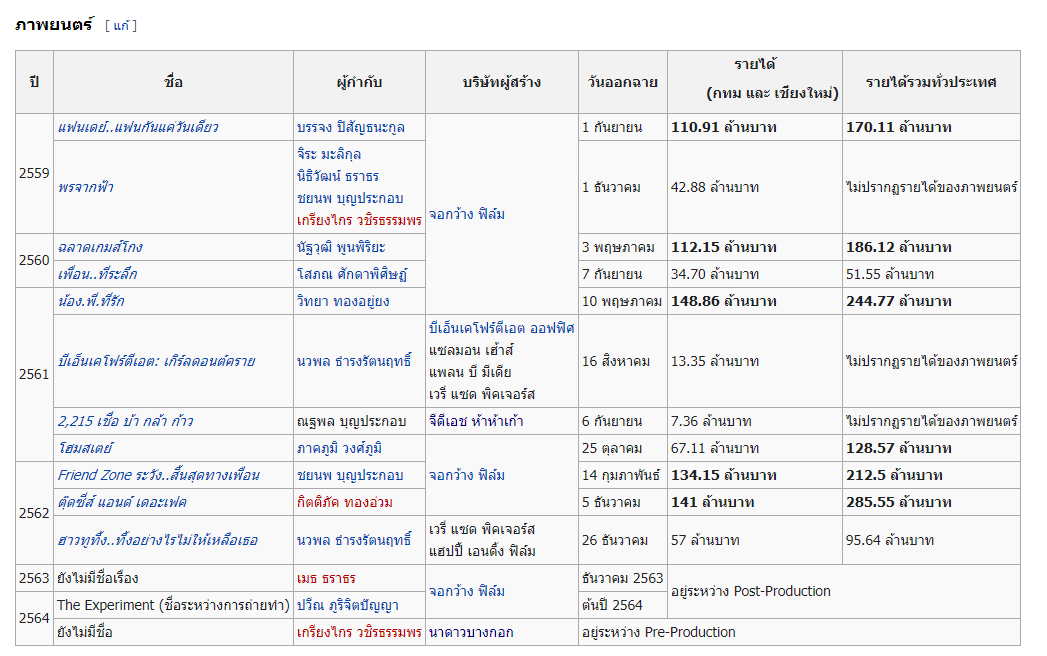

เช่นเคย เรามาเริ่มต้นจากการหา `<table>` ที่เราต้องการกันก่อน

In [ ]:
# 4.1.1 : ค้นหาตารางที่เก็บข้อมูลภาพยนตร์

table2 = soup.find(.........................)



print(str(table2)[:1000])

In [ ]:
# 4.1.2 : copyตาราง และ extract 'rowspan' ทิ้ง 

simplified_table2 = copy.





print(simplified_table2)


In [ ]:
# 4.1.3 : แสดงข้อมูลหลังจากที่ extract 'rowspan' ทิ้งไปแล้ว
# สังเกตได้ว่า บาง row มีข้อมูล 3 elements บาง row มี 4 elements ขึ้นกับว่า แถวนั้นโดน extract 'rowspan' ไปหรือไม่
# *** Block นี้ไม่ต้องเติมอะไร ***

for tr in simplified_table2('tr'):
    cells = tr('td')
    if len(cells): 
        try:
            print('"%s", "%s", "%s", "%s"' % (cells[0].text, cells[1].text, cells[2].text, cells[3].text))
            print()
        except:
            print('"%s", "%s", "%s"' % (cells[0].text, cells[1].text, cells[2].text))
            print()

สำหรับคนที่อยากรู้ว่า ถ้าจะเอาข้อมูลปีที่เข้าฉายมาใช้ด้วย เราจะทำได้อย่างไร ลองพยายามทำความเข้าใจโค้ดข้างล่างนี้ดู

In [ ]:
# 4.1.4 : copy ข้อมูล table ไว้เพื่อที่จะได้ไม่ต้องเก็บใหม่ ในกรณีที่ข้อมูลถูกแก้ไขหรือเสียหายก็สามารถดึงข้อมูลจากต้นฉบับได้เลย
# code ที่ให้มาเป็นเพียง code ตัวอย่าง ไม่จำเป็นต้องใช้ตามนี้ก็ได้ จะเขียนใหม่เองทั้งหมดก็ได้

dup_table2 = copy.copy(..........................)

rows = dup_table2('tr')
header = rows[0]

current_year = None
company = None
movies = []

for tr in rows[1:]:
    movie = {}
    
    # เลือกทุก column ในแถวนั้น จะได้ [ปี พ.ศ., ชื่อ, ผู้กำกับ, บริษัทผู้สร้าง, วันออกฉาย]
    cells = tr(....)
    
    # ถ้า column ในแถวนั้นมี attribute 'rowspan' ให้เก็บ text นั้นไว้ใน current_year
    if cells[0].has_attr(.........):
        current_year = cells[0].text
    try: 
        if cells[3].has_attr('rowspan'):
            company = cells[3].text
    except:
        pass
    
    # เขียนเงื่อนไขอะไรบางอย่างเพื่อทำให้ผลลัพธ์ถูกต้อง
    
    
    
    
    
    ########################################

    movie['year'] = 
    movie['name'] = 
    movie['director'] = 
    movie['company'] = 
    movie['release'] = 
    
    # เราจะหา link ของรายชื่อหนังไปเก็บไว้ใน movie['url'] เฉพาะหนังที่มี link เท่านั้น
    # ภาพยนตร์ที่ไม่มี link ให้เก็บค่า - แทน
    if cells[0].a is not None:
        # ต้องแปลงจากภาษาไทยให้เป็น encode-string
        movie['url'] = .........................
    else:
        movie['url'] = '-'
    movies.append(movie)
    
    
# วนลูปเพื่อแสดงผลลัพธ์ข้อมูลของภาพยนตร์
for m in movies:
    print(m)
    print("\n")

ตัวอย่างผลลัพธ์ที่ได้ควรเป็นดังนี้

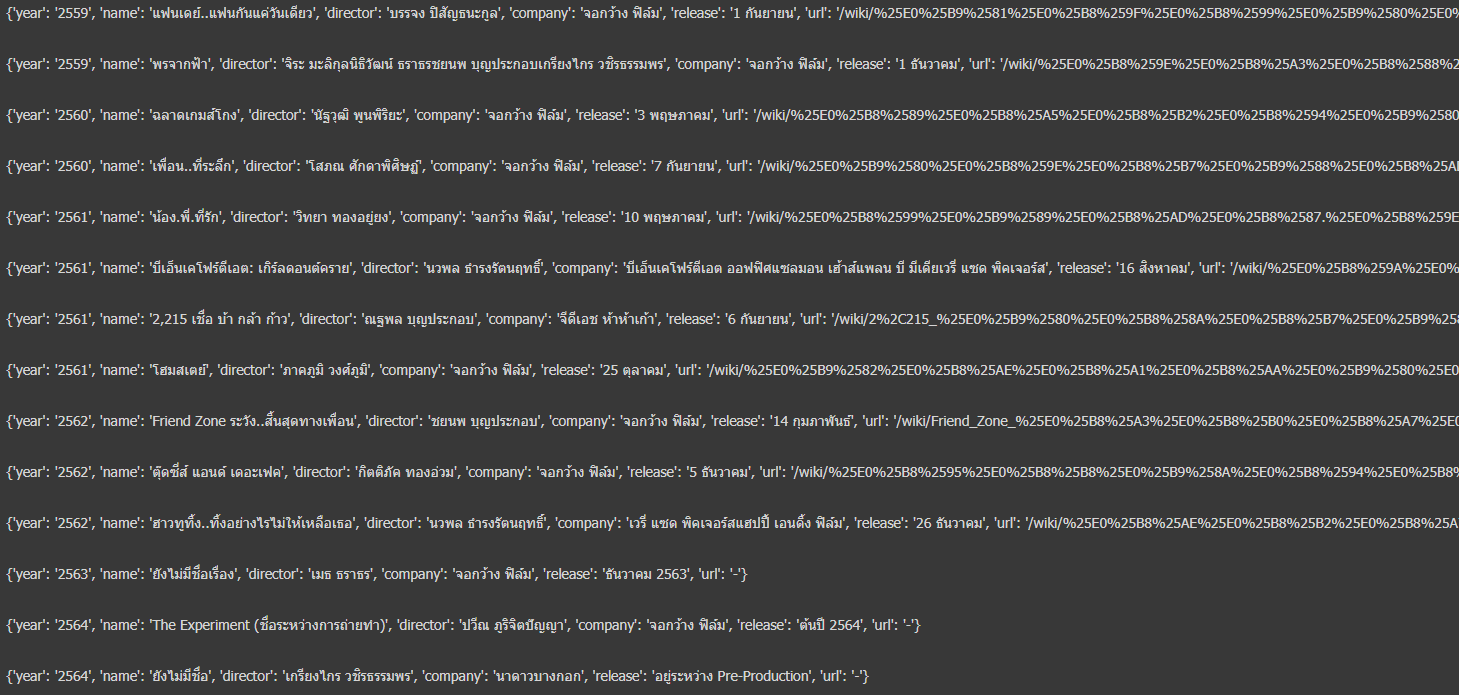

นำข้อมูลรายได้ของหนังแต่ละเรื่อง (เฉพาะภาพยนตร์ที่มี link) มาแสดงผล 

In [ ]:
# 4.1.5 : แสดงผลรายได้ของหนังแต่ละเรื่อง

for movie in movies:
    print('Processing ' + movie['name'] + '...')
    
    try:
        movie_html = urllib.request.urlopen('http://th.wikipedia.com' + movie['url'])
        movie_soup = BeautifulSoup(movie_html, 'html.parser')
        
        # ค้นหารายได้ของภาพยนตร์
        income_td = movie_soup.find(....................)
        
        movie['gross'] = income_td.text.split(" ")[0]
    except Exception as e:
        movie['gross'] = 'unknown'
    
    # มารยาทในการดึงข้อมูลเราควรที่จะต้องใส่ sleep เพื่อไม่ให้ server ทำงานหนักเกินไป
    sleep(1) 

In [ ]:
for m in movies:
    print('"%s", "%s", "%s", "%s ล้านบาท"' % 
          (m['name'], m['release'], m['director'], m['gross']))